In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pytesseract as ptt

rootpath = "/Users/lince/Desktop/"
scoreimg = mpimg.imread(rootpath + "number.jpg")
print(scoreimg.shape)

(82, 1294, 3)


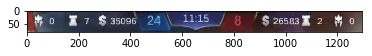

In [5]:
plt.imshow(scoreimg)

In [6]:
print(ptt.image_to_string(mpimg.imread(rootpath + "number.jpg"), lang="eng", config='digits'))

.
735096 . 8265832


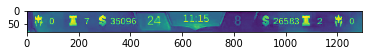

In [13]:
lena_1 = scoreimg[:,:,2]
plt.imshow(lena_1)

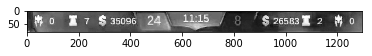

In [15]:
plt.imshow(lena_1, cmap='Greys_r')
plt.show()

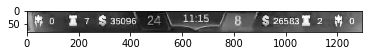

In [33]:
img = plt.imshow(scoreimg[:,:,0])
img.set_cmap('Greys_r') # 'hot' 是热量图
plt.show()

In [5]:
import cv2

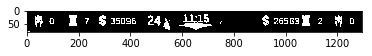

In [13]:
ret,thresh1 = cv2.threshold(scoreimg[:,:,2],127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, 'Greys_r')

In [50]:
text = ptt.image_to_string(thresh1, lang="eng")
print(text)

%o H7 Sasso 244. one $ 26503 2 Ho


In [51]:
text = ptt.image_to_string(thresh1, lang="eng", config='digits' )
print(text)

0730244. . 265032


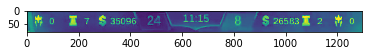

In [7]:
img_r, img_g, img_b = cv2.split(scoreimg)
plt.imshow(img_b)
plt.imshow(img_g)
plt.imshow(img_r)

In [36]:
img_r

array([[ 52,  52,  52, ...,  49,  47,  47],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 40,  40,  40, ...,  75,  76,  74],
       ...,
       [129, 132, 127, ..., 112, 113, 113],
       [164, 164, 175, ..., 115, 117, 117],
       [164, 164, 175, ..., 115, 117, 117]], dtype=uint8)

In [61]:
import numpy as np

# 蓝队分数：104，154，186 （RGB）
# 蓝队背景：24，48，81
# 红队分数：161，60，73
# 红队背景：79，27，28
bi_img_r = np.copy(img_r)
bi_img_g = np.copy(img_g)
bi_img_b = np.copy(img_b)

bi_img_r[(bi_img_r > 120) | (bi_img_r < 80)] = 0
bi_img_r[(bi_img_r <= 120) & (bi_img_r >= 80)] = 255

bi_img_g[(bi_img_g > 170) | (bi_img_g < 130)] = 0
bi_img_g[(bi_img_g <= 170) & (bi_img_g >= 130)] = 255

bi_img_b[(bi_img_b > 200) | (bi_img_b < 150)] = 0
bi_img_b[(bi_img_b <= 200) & (bi_img_b >= 150)] = 255

In [46]:
np.where(bi_img_r > 0)

(array([ 2,  2,  2, ..., 81, 81, 81]),
 array([  22,   23,   24, ..., 1291, 1292, 1293]))

In [47]:
img_r

array([[ 52,  52,  52, ...,  49,  47,  47],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 40,  40,  40, ...,  75,  76,  74],
       ...,
       [129, 132, 127, ..., 112, 113, 113],
       [164, 164, 175, ..., 115, 117, 117],
       [164, 164, 175, ..., 115, 117, 117]], dtype=uint8)

In [62]:
merged = cv2.merge([bi_img_b,bi_img_g,bi_img_r])

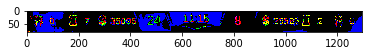

In [63]:
plt.imshow(merged)

In [64]:
unique, counts = np.unique(bi_img_b, return_counts=True)
print("b:",dict(zip(unique, counts)))
unique, counts = np.unique(bi_img_g, return_counts=True)
print("g:",dict(zip(unique, counts)))
unique, counts = np.unique(bi_img_r, return_counts=True)
print("r:",dict(zip(unique, counts)))

b: {0: 101635, 255: 4473}
g: {0: 102435, 255: 3673}
r: {0: 80670, 255: 25438}


In [209]:
img_r

array([[ 37,  37,  35, ...,  41,  41,  41],
       [ 15,  15,  15, ...,   3,   3,   3],
       [110, 110, 110, ...,  95,  96,  96],
       ...,
       [147, 152, 150, ..., 125, 125, 125],
       [184, 184, 197, ..., 128, 129, 129],
       [184, 184, 197, ..., 128, 129, 129]], dtype=uint8)

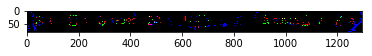

In [16]:
import numpy as np

# 蓝队分数：104，154，186 （RGB）
# 蓝队背景：24，48，81
# 红队分数：161，60，73
# 红队背景：79，27，28
bi_img_r = np.copy(img_r)
bi_img_g = np.copy(img_g)
bi_img_b = np.copy(img_b)

bi_img_r[(bi_img_r > 110) | (bi_img_r < 100)] = 0
bi_img_r[(bi_img_r <= 110) & (bi_img_r >= 100)] = 255

bi_img_g[(bi_img_g > 160) | (bi_img_g < 150)] = 0
bi_img_g[(bi_img_g <= 160) & (bi_img_g >= 150)] = 255

bi_img_b[(bi_img_b > 190) | (bi_img_b < 180)] = 0
bi_img_b[(bi_img_b <= 190) & (bi_img_b >= 180)] = 255
# bi_img_r[bi_img_r == 104] = 255
# bi_img_r[bi_img_r < 255] = 0

# bi_img_g[bi_img_g == 154] = 255
# bi_img_g[bi_img_g < 255] = 0

# bi_img_b[bi_img_b == 186] = 255
# bi_img_b[bi_img_b < 255] = 0

merged = cv2.merge([bi_img_b,bi_img_g,bi_img_r])
plt.imshow(merged)

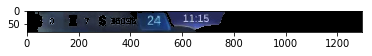

In [18]:
lower_blue=np.array([78,43,46])
upper_blue=np.array([124,255,255])
hsv = cv2.cvtColor(scoreimg, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(scoreimg, scoreimg, mask=mask)
plt.imshow(res)

In [20]:
print(ptt.image_to_string(res, lang="eng", config='digits'))

In [37]:
res.shape

(82, 1294, 3)

In [49]:
rgb_res = cv2.cvtColor(res, cv2.COLOR_HSV2RGB)

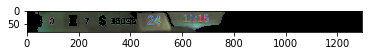

In [50]:
plt.imshow(rgb_res)

In [51]:
print(ptt.image_to_string(rgb_res, lang="eng", config='digits'))

735096.


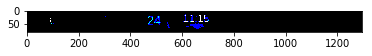

In [94]:
ret,thresh1 = cv2.threshold(res,150,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, 'Greys_r')

In [95]:
print(ptt.image_to_string(thresh1, lang="eng", config='digits'))

4

24.


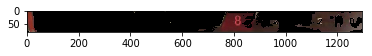

In [97]:
lower_blue=np.array([78,43,46])
upper_blue=np.array([124,255,255])
hsv_r = cv2.cvtColor(scoreimg, cv2.COLOR_BGR2HSV)
mask_r = cv2.inRange(hsv_r, lower_blue, upper_blue)
res_r = cv2.bitwise_and(scoreimg, scoreimg, mask=mask_r)
plt.imshow(res_r)

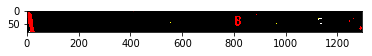

In [159]:
ret,thresh1 = cv2.threshold(res_r,120,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, 'Greys_r')

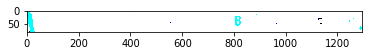

In [160]:
thresh1 = ~thresh1
plt.imshow(thresh1)

In [161]:
print(ptt.image_to_string(thresh1, lang="eng", config='digits'))

In [162]:
thresh1.shape

(82, 1294, 3)

In [131]:
print(ptt.image_to_string(mpimg.imread(rootpath + "temp2.jpg"), lang="eng", config='digits'))

In [171]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img_path = rootpath + "temp2.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

553467904/553467096 [==============================] - 763s 1us/step
Predicted: [('n03032252', 'cinema', 0.11224991), ('n04286575', 'spotlight', 0.05842601), ('n03028079', 'church', 0.05303911)]


In [172]:
print(ptt.image_to_string(mpimg.imread(rootpath + "24.jpg"), lang="eng", config='digits'))

24


In [177]:
print(ptt.image_to_string(mpimg.imread(rootpath + "8_1.jpg"), lang="eng", config='digits'))

In [208]:
print(ptt.image_to_string(mpimg.imread(rootpath + "banner_1.jpg"), lang="eng", config='digits psm 6'))

2411158


In [190]:
print(ptt.image_to_boxes(mpimg.imread(rootpath + "banner_1.jpg")))

2 34 21 60 57 0
4 62 19 86 57 0
\ 108 3 126 63 0
_ 134 3 166 63 0
1 174 31 194 61 0
1 196 31 216 61 0
1 220 24 250 61 0
5 252 27 272 61 0
_ 276 3 308 63 0
/ 316 21 334 63 0
8 374 24 394 53 0


In [187]:
print(ptt.image_to_boxes(mpimg.imread(rootpath + "banner_3.jpg")))

o 8 6 62 54 0
N 89 6 110 68 0
O 152 30 172 58 0
a 172 30 200 58 0
t 202 30 242 58 0
s 280 22 302 68 0
4 338 22 342 50 0


In [8]:
print(ptt.image_to_string(mpimg.imread(rootpath + "8.jpg"), lang="eng", config='digits psm 10'))

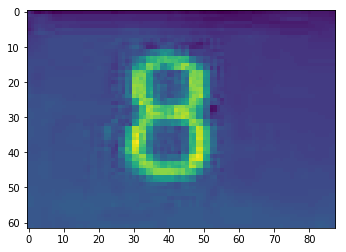

In [9]:
grayimg = cv2.cvtColor(mpimg.imread(rootpath + "8.jpg"), cv2.COLOR_RGB2GRAY)
plt.imshow(grayimg)

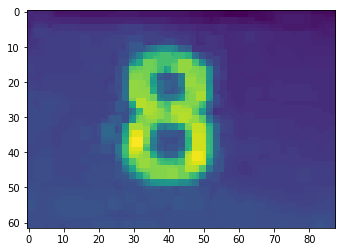

In [14]:
kernel = np.ones((3,3), np.uint8)

img_erosion = cv2.erode(grayimg, kernel, iterations=1) 
img_dilation = cv2.dilate(grayimg, kernel, iterations=1)

plt.imshow(img_dilation)

In [1]:
print()

In [42]:
print(ptt.image_to_string(mpimg.imread(rootpath + "5.jpg"), lang="eng", config="digits --psm 6"))

In [232]:
grayimg = cv2.cvtColor(mpimg.imread(rootpath + "24.jpg"), cv2.COLOR_RGB2GRAY)
print(ptt.image_to_string(mpimg.imread(rootpath + "24.jpg"), lang="eng", config='digits psm 1'))

24


In [221]:
print(ptt.image_to_string(grayimg, lang="eng", config='digits psm 6'))

In [29]:
import tesserocr as tocr
from PIL import Image

pil_img = Image.fromarray(mpimg.imread(rootpath + "18.jpg"))
print(tocr.image_to_text(pil_img))

534 0 213 40


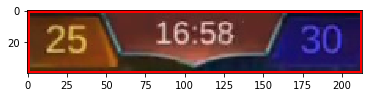

In [75]:
import sys
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

rootpath = "/Users/lince/Desktop/WORK/98_Startup/01_YTClip/01_VideoRes/02/"
img = cv2.imread(rootpath + "0_31.jpg")

mser = cv2.MSER_create(_min_area=300)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

width = img.shape[1]
height = img.shape[0]

x, y, w, h = int(width/2)-int(width/12), 0, int(width/6), int(height/18)
cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
patch = img[y:y+h, x:x+w]
print(x, y, w, h)

# regions, boxes = mser.detectRegions(gray)
# for box in boxes:
#     x, y, w, h = box
#     cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)
#     patch = img[y:y+h, x:x+w]
#     print(x, y, w, h)

plt.imshow(patch,'brg')
plt.show()

In [39]:
img.shape

(720, 1280, 3)

In [84]:
# remove black coundry

from PIL import Image
import os

src_folder = "src"
tar_folder = "tar"
backup_folder = "backup"

def isCrust(pix):
    return sum(pix) < 5

def hCheck(img, y, step = 50):
    count = 0
    width = img.size[0]
    for x in range(0, width, step):
        if isCrust(img.getpixel((x, y))):
            count += 1
        if count > width / step / 2:
            return True
    return False
 
def vCheck(img, x, step = 50):
    count = 0
    height = img.size[1]
    for y in range(0, height, step):
        if isCrust(img.getpixel((x, y))):
            count += 1
        if count > height / step / 2:
            return True
    return False
 
def boundaryFinder(img,crust_side,core_side,checker):
    if not checker(img,crust_side):
        return crust_side
    if checker(img,core_side):
        return core_side
 
    mid = (crust_side + core_side) / 2
    while  mid != core_side and mid != crust_side:
        if checker(img,mid):
            crust_side = mid
        else:
            core_side = mid
        mid = (crust_side + core_side) / 2
    return core_side
    pass
 
def handleImage(filename,tar):
    img = Image.open(os.path.join(src_folder,filename))
    if img.mode != "RGB":
        img = img.convert("RGB")
    width, height = img.size
 
    left = boundaryFinder(img, 0, width/2, vCheck)
    right = boundaryFinder(img, width-1, width/2, vCheck)
    top = boundaryFinder(img, 0, height/2, hCheck)
    bottom = boundaryFinder(img, height-1, width/2, hCheck)
 
    rect = (left,top,right,bottom)
    print(rect)
    region = img.crop(rect)
    region.save(os.path.join(tar,filename),'PNG')
    pass
 
def folderCheck(foldername):
    if foldername:
        if not os.path.exists(foldername):
            os.mkdir(foldername) 
            print("Info: Folder \"%s\" created" % foldername)
        elif not os.path.isdir(foldername):
            print("Error: Folder \"%s\" conflict" % foldername)
            return False
    return True
    pass
 
if folderCheck(tar_folder) and folderCheck(src_folder) and folderCheck(backup_folder):
    for filename in os.listdir(src_folder):
        if filename.split('.')[-1].upper() in ("JPG","JPEG","PNG","BMP","GIF"):
            handleImage(filename,tar_folder)
            os.rename(os.path.join(src_folder,filename),os.path.join(backup_folder,filename))

(0, 39.0, 1279, 684.9999999999999)
(0, 0, 1279, 719)
(0, 0, 1279, 719)
(0, 0, 1279, 719)
(0, 39.0, 1279, 685.9999999999999)


In [83]:
ls

FrameSampling.ipynb  backup/              tar/
ScoreProcess.ipynb   src/                 tar1/
